In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [2]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, tx, ids = load_csv_data(DATA_TRAIN_PATH)

In [3]:
from implementations import *
#from data_analysis import *
#from visualisation import *
#from preprocessing import *

## Do your thing crazy machine learning thing here :) ...

In [ ]:
#Try with all data

initial_w = np.zeros(tx.shape[1])
max_iters = 100
gamma = 1e-3

## Test on some small data
#weights, loss = logistic_regression(y[:200000], tx[:200000], initial_w, max_iters, gamma)
#weights, loss = least_squares(y[:200000], tx[:200000]) 
#weights, loss = ridge_regression(y[:200000], tx[:200000], gamma)
#weights, loss = least_squares_SGD(y[:200000], tx[:200000], initial_w, max_iters, gamma)
#weights, loss = least_squares_GD(y[:200000], tx[:200000], initial_w, max_iters, gamma)

print(loss)
y_pred = predict_labels(weights, tx[30000:])
print(np.dot(tx[30000:], weights))
print(weights.shape)

accuracy = np.sum(y_pred==y[30000:]) / y_pred.shape[0]

print(accuracy)

#create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

In [ ]:
#Try with normalized data

initial_w = np.zeros(tX.shape[1])
max_iters = 100
gamma = 1e-3

## Test on some small data
#weights, loss = logistic_regression(y[:30000], tX[:30000], initial_w, max_iters, gamma)
#(weights, loss) = least_squares(y[:30000], tX[:30000]) #works
#(weights, loss) = ridge_regression(y[:30000], tX[:30000], gamma) #works
(weights, loss) = least_squares_SGD(y[:30000], normalized_x[:30000], initial_w, max_iters, gamma)

print(loss)
y_pred = predict_labels(weights, normalized_x[30000:])
print(np.dot(normalized_x[30000:], weights))
print(weights.shape)

accuracy = np.sum(y_pred==y[30000:]) / y_pred.shape[0]

print(accuracy)

#create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

In [ ]:
#Quick testing of functions
w_initial = np.ones(30)
max_iters=10
gamma = 0.1
lambda_ = 0.01
w_lsgd = least_squares_GD(y, tX, w_initial, max_iters, gamma)
w_lssgd = least_squares_SGD(y, tX, w_initial, max_iters, gamma)
w_ls = least_squares(y, tX)
w_rg = ridge_regression(y, tX, lambda_)

In [ ]:
print(w_lsgd, w_lssgd, w_ls, w_rg)

## Generate predictions and save ouput in csv format for submission:

In [ ]:
DATA_TEST_PATH = '../data/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [ ]:
OUTPUT_PATH = '../output' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

## Selection of model parameters

In [4]:
from param_selection import gamma_grid_search, lambda_grid_search

In [16]:
gammas = np.logspace(-5, -1, 10)
k_fold = 4

loss_logreg, loss_ls_GD, loss_ls_SGD = gamma_grid_search(y, tx, gammas, k_fold)

1
2
3
4
5
6
7
8
9
10


In [17]:
def plot_gamma_search(gammas, losses, folder_path):

    fig, axes = plt.subplots(1, 3, figsize=(12, 5))

    xlabels = ['logistic_regression', 'least_squares_GD', 'least_squares_SGD']

    for ax_nb in range(3):
        
        loss = np.array(losses[ax_nb])
        axes[ax_nb].semilogx(gammas, loss[:, 0], marker=".", color='b', label='train error')
        axes[ax_nb].semilogx(gammas, loss[:, 1], marker=".", color='r', label='test error')
        if ax_nb==0:
            axes[ax_nb].set_ylabel("loss")
        axes[ax_nb].set_xlabel(xlabels[ax_nb])
        axes[ax_nb].grid(True)
        axes[ax_nb].legend(loc="upper right")

    fig.suptitle('Gamma grid search')
    plt.tight_layout()
    plt.savefig((folder_path+'gammas'))
    plt.show()

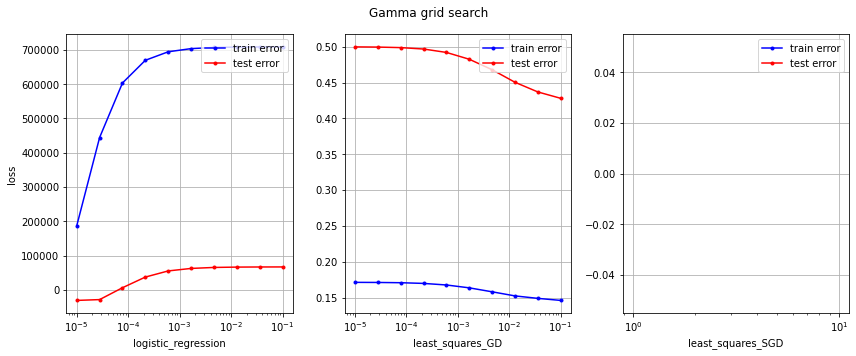

In [18]:
folder_path = '../figs/'

plot_gamma_search(gammas, [loss_logreg, loss_ls_GD, loss_ls_SGD], folder_path)

In [28]:
lambdas = np.linspace(-5, 5, 20)
loss_logreg_reg, loss_ridge = lambda_grid_search(y, tx, lambdas, k_fold)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [29]:
def plot_lambda_search(lambdas, losses, folder_path):

    fig, axes = plt.subplots(1, 2, figsize=(8, 5))

    xlabels = ['reg_logistic_regression', 'ridge_regression']

    for ax_nb in range(2):
        
        loss = np.array(losses[ax_nb])
        axes[ax_nb].semilogx(lambdas, loss[:, 0], marker=".", color='b', label='train error')
        axes[ax_nb].semilogx(lambdas, loss[:, 1], marker=".", color='r', label='test error')
        if ax_nb==0:
            axes[ax_nb].set_ylabel("loss")
        axes[ax_nb].set_xlabel(xlabels[ax_nb])
        axes[ax_nb].grid(True)
        axes[ax_nb].legend(loc="upper right")

    fig.suptitle('Lambda grid search')
    plt.tight_layout()
    plt.savefig((folder_path+'lambdas'))
    plt.show()

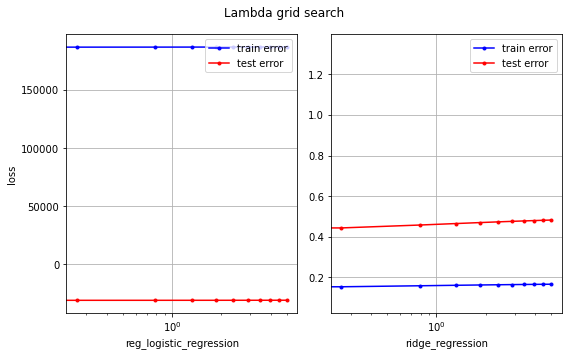

In [30]:
plot_lambda_search(lambdas, [loss_logreg_reg, loss_ridge], folder_path)

In [31]:
gammas

array([1.00000000e-05, 2.78255940e-05, 7.74263683e-05, 2.15443469e-04,
       5.99484250e-04, 1.66810054e-03, 4.64158883e-03, 1.29154967e-02,
       3.59381366e-02, 1.00000000e-01])

In [33]:
loss_logreg_reg

[array([186627.68358843, -30959.8534457 ]),
 array([186653.13335042, -30951.01135467]),
 array([186678.57746116, -30942.17108834]),
 array([186704.01592366, -30933.33264578]),
 array([186729.44874088, -30924.49602609]),
 array([186754.87591581, -30915.66122835]),
 array([186780.29745142, -30906.82825167]),
 array([186805.71335069, -30897.99709512]),
 array([186831.12361658, -30889.16775782]),
 array([186856.52825205, -30880.34023884]),
 array([186881.92726009, -30871.5145373 ]),
 array([186907.32064364, -30862.69065228]),
 array([186932.70840567, -30853.8685829 ]),
 array([186958.09054913, -30845.04832825]),
 array([186983.46707698, -30836.22988743]),
 array([187008.83799218, -30827.41325956]),
 array([187034.20329766, -30818.59844373]),
 array([187059.56299639, -30809.78543905]),
 array([187084.9170913 , -30800.97424463]),
 array([187110.26558533, -30792.16485959])]